# Lesson 6
### Written by Adithya Solai

# Simple Linear Regression

-A way to relate two variables with statistical confidence.

-Ex: Does Mortality increase as Age increases?

-Ex: Does the Error Rate decrease as Time Practiced increases?

*For now, we will only cover linear relationships like "Y goes down as X goes up". It is possible to expand Linear Regression to a generalized "Polynomial Regression" that can handle more nuanced relationships like quadratic (or any polynomial relationship), log, etc.*

**Let's run a Linear Regression in Python on our NBA season average data.**

In [1]:
import pandas as pd
import numpy as np

# This library is used to do simple plots before running our regression
import matplotlib.pyplot as plt

# Two libraries you can do linear regression with.
from sklearn import linear_model
import statsmodels.api as sm

# Used for displaying images from the internet I found to help learn this.
from IPython.display import Image

c:\Users\pratb\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Just load the pre-made data from our csv file for now.**

In [2]:
nba = pd.read_csv("./datasets/NBA Reg Season Player Avgs with Win Pct 2000-2019.csv")
nba.head()

,Year,Player,Tm,start_pct,MP,PTS,TRB,AST,FGA,FG%,...,3P%,2PA,2P%,FTA,FT%,STL,BLK,TOV,PF,win_pct
0,2001,Shareef Abdur-Rahim,VAN,1.000000,40.0,20.5,9.1,3.1,15.8,0.472,...,0.188,15.0,0.487,6.6,0.834,1.1,1.0,2.9,2.9,0.280488
1,2001,Mike Bibby,VAN,1.000000,38.9,15.9,3.7,8.4,14.1,0.454,...,0.379,10.6,0.478,2.3,0.761,1.3,0.1,3.0,1.8,0.280488
2,2001,Michael Dickerson,VAN,0.985714,37.4,16.3,3.3,3.3,14.6,0.417,...,0.374,11.3,0.429,3.9,0.763,0.9,0.4,2.3,3.0,0.280488
3,2001,Othella Harrington,VAN,0.909091,28.8,10.9,6.6,0.8,8.8,0.466,...,0.000,8.7,0.470,3.5,0.779,0.4,0.6,2.4,3.1,0.280488
4,2001,Bryant Reeves,VAN,0.640000,24.4,8.3,6.0,1.1,7.4,0.460,...,0.250,7.3,0.462,1.9,0.796,0.6,0.7,1.2,3.2,0.280488


**Let's look at all the column names to help hypothesize which two variables might be related.**

In [3]:
nba.columns

Index(['Year', 'Player', 'Tm', 'start_pct', 'MP', 'PTS', 'TRB', 'AST', 'FGA',
       'FG%', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'STL', 'BLK', 'TOV',
       'PF', 'win_pct'],
      dtype='object')

**Maybe we can expect that points scored (`PTS`) goes up as minutes played (`MP`) goes up?**

Let's first make a scatterplot of these two columns to explore the data.

c:\Users\pratb\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\pratb\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\pratb\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


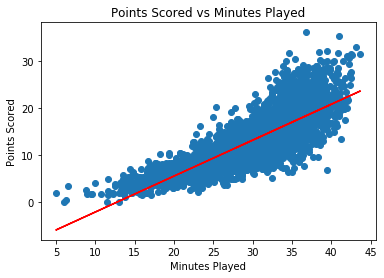

In [4]:
plt.scatter(x=nba['MP'], y=nba['PTS'])
plt.title("Points Scored vs Minutes Played")
plt.xlabel("Minutes Played")
plt.ylabel("Points Scored")

# m is slope and b is intercept of linear regression line
x=nba['MP']
y=nba['PTS']
m, b = np.polyfit(x,y,1)

# x is still x, but y = mx + b
plt.plot(x, m*x + b, 'r')    
    
plt.show()

**It seems like the BEST way to characterize this relationship would be a quadratic relationship (`PTS` = `MP` ^ 2).**

However, let's just test a simple, **positive**, linear relationship for now.

### Hypothesis Testing

Before running the linear regression model, we need to formally define what exactly we are hoping to test, and what the possible outcomes of our study could be.

Ho: Points & MP have NO relationship.

Ha: Points & MP have a positive, linear relationship.

Ho: m=0

Ha: m>0

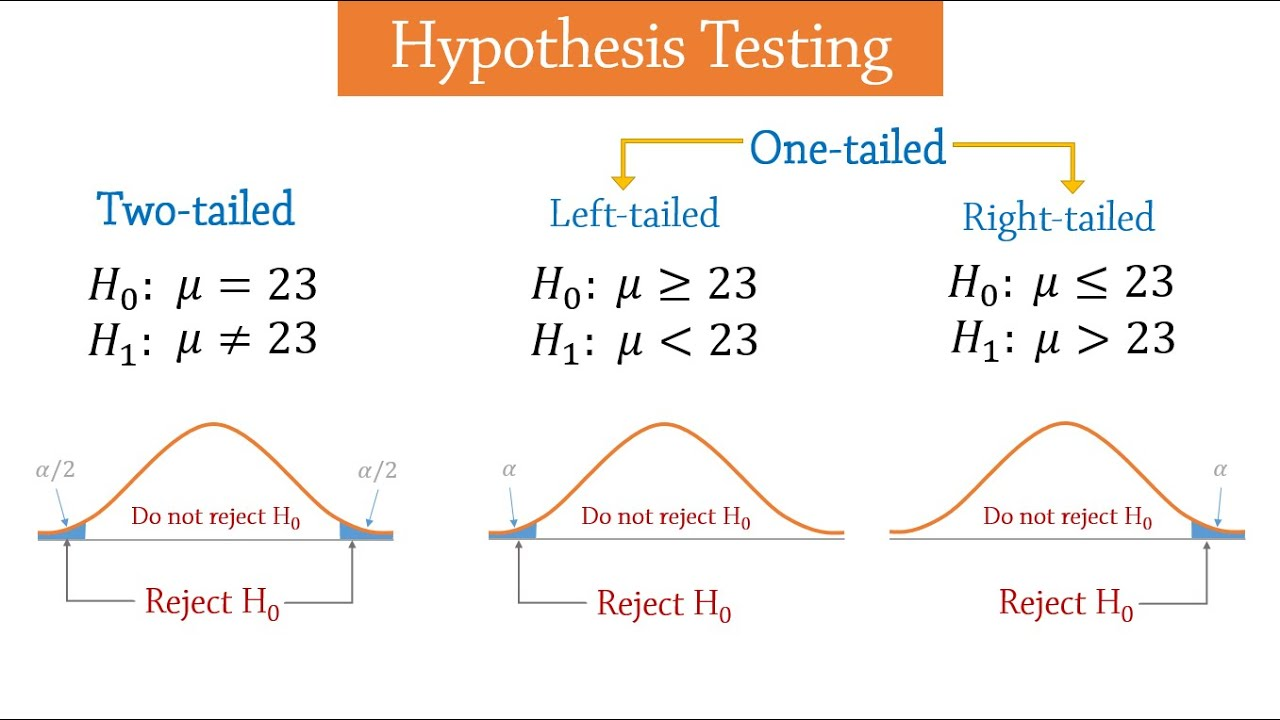

In [5]:
Image("./images/hypothesisTesting.jpg")

**t-test**
95% confident
Is our t-value greater than the t-critical for 95%
t-values > 1.96

**p-values**

y = mx + b

PTS = m(MP) + b

In [6]:
# Only using 'Year' column, so we need to reshape to fit scikit's fit() function
regr_X = np.array(nba['MP']).reshape(-1,1)
# Response is '3PA', or the average # of 3-pointers attempted Per Game
regr_y = nba['PTS']

# Building a linear regression model using scikit's sklearn
regr = linear_model.LinearRegression()

# Calculating the parameters of our regression model using the fit() method
lin_model = regr.fit(X=regr_X, y=regr_y)

# Coefficient of year in our model
print("Coefficient of minutes played in our model: ", lin_model.coef_)

# Intercept Value in our model
print("Intercept in our model: ", lin_model.intercept_)

# Coefficient of Determination Score
print("R^2 Score: ", regr.score(X=regr_X, y=regr_y))

Coefficient of minutes played in our model:  [0.76379986]
Intercept in our model:  -9.762575722948228
R^2 Score:  0.6433337196726847


PTS = (0.76) MP - 9.76  

In [7]:
# Need to add a column of 1s to create a constant term
# statsmodels.api does not do it for us like sklearn does
summary_X = sm.add_constant(regr_X)

# Make into dataframes to make sure variable names are shown in output
summary_X = pd.DataFrame(summary_X).reset_index(drop=True)
summary_X.columns = ['Constant', 'MP']
summary_y = pd.DataFrame(regr_y).reset_index(drop=True)

summary_est = sm.OLS(summary_y, summary_X)

print(summary_est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     6328.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        23:43:55   Log-Likelihood:                -9302.1
No. Observations:                3510   AIC:                         1.861e+04
Df Residuals:                    3508   BIC:                         1.862e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -9.7626      0.296    -33.002      0.0

t-critical = 1.960
Our model's t-value = 79.546

Since our t-value was > t*, we have statistically-significant evidence to suggest at a 95% confidence level that Minutes Played and Points Scored have a positive, linear relationship 

# Multiple Linear Regression

-A way to determine the relationship between more than 1 predictor and 1 response variable.

-Ex: Out of exercise, sleep, and daily calories, which variables are most significant/important in predicting a human's lifespan?

-Ex: Out of houshold income, ethnicity, and IQ, which variables are most significant/important in predicting a student's future salary?

**Let's tackle the following question about our NBA dataset using Multiple Linear Regression:**

*Out of points scored (`PTS`), assists (`AST`), rebounds (`TRB`), steals (`STL`), blocks (`BLK`), 3-pt% (`3P%`), 2-pt% (`2P%`), free throw % (`FT%`), turnovers (`TOV`), and personal fouls (`PF`), which season average stat categories of a player are most significant/important in predicting their team's overall win percentage (`win_pct`)?*

### We need to do some extra data preparation before we can run the Multiple Linear Regression (or MLR)

We don't care about `Year`, `Player` (the player's name), `Tm`, or `start_pct`, since these don't help us answer which player metrics lead to more wins.

We will also drop `FGA` & `FG%` (field-goal metrics) because those columns can be derived from 3PA, 3P%, 2PA, and 2P%. *("field goal" is just a a term to describe non-Free Throw points earned (3-pointers and 2-pointers)*

Keeping these columns could cause severe multicollinearity, which adds noise to our final Multiple Linear Regression. Read more about multicollinearity here: https://www.statisticshowto.com/multicollinearity/. Being able to transform other predictor variables into FGA and FG% makes these variables the worst case scenario for multicollinearity, since the relationship is exact, direct, and CAUSAL.

Also, we will create a new df `nba_mlr` to keep the original `nba` df intact for future analysis.

In [8]:
nba.head()

,Year,Player,Tm,start_pct,MP,PTS,TRB,AST,FGA,FG%,...,3P%,2PA,2P%,FTA,FT%,STL,BLK,TOV,PF,win_pct
0,2001,Shareef Abdur-Rahim,VAN,1.000000,40.0,20.5,9.1,3.1,15.8,0.472,...,0.188,15.0,0.487,6.6,0.834,1.1,1.0,2.9,2.9,0.280488
1,2001,Mike Bibby,VAN,1.000000,38.9,15.9,3.7,8.4,14.1,0.454,...,0.379,10.6,0.478,2.3,0.761,1.3,0.1,3.0,1.8,0.280488
2,2001,Michael Dickerson,VAN,0.985714,37.4,16.3,3.3,3.3,14.6,0.417,...,0.374,11.3,0.429,3.9,0.763,0.9,0.4,2.3,3.0,0.280488
3,2001,Othella Harrington,VAN,0.909091,28.8,10.9,6.6,0.8,8.8,0.466,...,0.000,8.7,0.470,3.5,0.779,0.4,0.6,2.4,3.1,0.280488
4,2001,Bryant Reeves,VAN,0.640000,24.4,8.3,6.0,1.1,7.4,0.460,...,0.250,7.3,0.462,1.9,0.796,0.6,0.7,1.2,3.2,0.280488


In [9]:
nba_mlr = nba.drop(labels=['Year', 'Player', 'Tm', 'start_pct', 'FGA', 'FG%'], axis=1)
nba_mlr.head()

,MP,PTS,TRB,AST,3PA,3P%,2PA,2P%,FTA,FT%,STL,BLK,TOV,PF,win_pct
0,40.0,20.5,9.1,3.1,0.8,0.188,15.0,0.487,6.6,0.834,1.1,1.0,2.9,2.9,0.280488
1,38.9,15.9,3.7,8.4,3.5,0.379,10.6,0.478,2.3,0.761,1.3,0.1,3.0,1.8,0.280488
2,37.4,16.3,3.3,3.3,3.3,0.374,11.3,0.429,3.9,0.763,0.9,0.4,2.3,3.0,0.280488
3,28.8,10.9,6.6,0.8,0.1,0.000,8.7,0.470,3.5,0.779,0.4,0.6,2.4,3.1,0.280488
4,24.4,8.3,6.0,1.1,0.1,0.250,7.3,0.462,1.9,0.796,0.6,0.7,1.2,3.2,0.280488


Next, we will **standardize** tally stats like `PTS`, `TRB` (total rebounds), `AST` (assists), `STL` (steals), `BLK` (blocks), `TOV` (turnovers), and `PF` (personal fouls) by dividing them by the minutes played (or `MP`). This will help show how efficient each player is in each of these stats.

This change evens out the playing field between starters, who get the majority of minutes, and role players, who don't get to play as long. This forces our model to care more about the actual tally stat instead of allowing some super dominant player like LeBron James, who alone drives up his team's win_pct significantly, to skew the model.

Drop the `MP` column after this standardization, as it no longer serves any purpose.

Rename the columns we just standardized to indicate that these are now **efficiency** metric. Ex: `PT` --> `efPT`.

In [10]:
# Standardize by converting these to efficiency metrics
nba_mlr['PTS'] = nba_mlr['PTS'] / nba_mlr['MP']
nba_mlr['TRB'] = nba_mlr['TRB'] / nba_mlr['MP']
nba_mlr['AST'] = nba_mlr['AST'] / nba_mlr['MP']
nba_mlr['STL'] = nba_mlr['STL'] / nba_mlr['MP']
nba_mlr['BLK'] = nba_mlr['BLK'] / nba_mlr['MP']
nba_mlr['TOV'] = nba_mlr['TOV'] / nba_mlr['MP']
nba_mlr['PF'] = nba_mlr['PF'] / nba_mlr['MP']

# Drop `MP` column
nba_mlr = nba_mlr.drop(labels=['MP'], axis=1)

# Rename columns
new_names = {'PTS': 'efPTS',
             'TRB': 'efTRB',
             'AST': 'efAST',
             'STL': 'efSTL',
             'BLK': 'efBLK',
             'TOV': 'efTOV',
             'PF': 'efPF'}
nba_mlr = nba_mlr.rename(columns=new_names)

nba_mlr.head()

,efPTS,efTRB,efAST,3PA,3P%,2PA,2P%,FTA,FT%,efSTL,efBLK,efTOV,efPF,win_pct
0,0.512500,0.227500,0.077500,0.8,0.188,15.0,0.487,6.6,0.834,0.027500,0.025000,0.072500,0.072500,0.280488
1,0.408740,0.095116,0.215938,3.5,0.379,10.6,0.478,2.3,0.761,0.033419,0.002571,0.077121,0.046272,0.280488
2,0.435829,0.088235,0.088235,3.3,0.374,11.3,0.429,3.9,0.763,0.024064,0.010695,0.061497,0.080214,0.280488
3,0.378472,0.229167,0.027778,0.1,0.000,8.7,0.470,3.5,0.779,0.013889,0.020833,0.083333,0.107639,0.280488
4,0.340164,0.245902,0.045082,0.1,0.250,7.3,0.462,1.9,0.796,0.024590,0.028689,0.049180,0.131148,0.280488


For the same reasons we standardized the tally stats above, we will drop the `3PA`, `2PA`, and `FTA` columns, since these just measure average # of 3-pt, 2-pt, and free-throw attempts, which is more based on minutes played and does not capture efficiency. We already have the `3P%`, `2P%`, and `FTA` columns to capture efficiency.

In [11]:
nba_mlr = nba_mlr.drop(labels=['3PA', '2PA', 'FTA'], axis=1)
nba_mlr.head()

,efPTS,efTRB,efAST,3P%,2P%,FT%,efSTL,efBLK,efTOV,efPF,win_pct
0,0.512500,0.227500,0.077500,0.188,0.487,0.834,0.027500,0.025000,0.072500,0.072500,0.280488
1,0.408740,0.095116,0.215938,0.379,0.478,0.761,0.033419,0.002571,0.077121,0.046272,0.280488
2,0.435829,0.088235,0.088235,0.374,0.429,0.763,0.024064,0.010695,0.061497,0.080214,0.280488
3,0.378472,0.229167,0.027778,0.000,0.470,0.779,0.013889,0.020833,0.083333,0.107639,0.280488
4,0.340164,0.245902,0.045082,0.250,0.462,0.796,0.024590,0.028689,0.049180,0.131148,0.280488


Last bit of Data Prep: 

Drop all rows with NaN for `3P%`, `2P%`, and `FT%` (players that never took any 3-pt shots, 2-pt shots, or free throws).

In [12]:
print("Before: ", nba_mlr.shape)
nba_mlr = nba_mlr[nba_mlr['3P%'].isnull() == False]
nba_mlr = nba_mlr[nba_mlr['2P%'].isnull() == False]
nba_mlr = nba_mlr[nba_mlr['FT%'].isnull() == False]
print("After: ", nba_mlr.shape)

Before:  (3510, 11)
After:  (3197, 11)


Now, we're ready to run our Multiple Linear Regression with `win_pct` as the response, and all other columns above as the predictors.

In [13]:
# Select all columns except `win_pct`, which is our response
regr_X = nba_mlr.loc[:, nba_mlr.columns != 'win_pct']

# Response is `win_pct`
regr_y = nba_mlr['win_pct']

# Need to add a column of 1s to create a constant term
# statsmodels.api does not do it for us like sklearn does
summary_X = sm.add_constant(regr_X)

# Make into dataframes to make sure variable names are shown in output
summary_X = pd.DataFrame(summary_X).reset_index(drop=True)
summary_X.columns =  ['Constant'] + list(nba_mlr.columns[:-1])
summary_y = pd.DataFrame(regr_y).reset_index(drop=True)

summary_est = sm.OLS(summary_y, summary_X)

print(summary_est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     49.54
Date:                Tue, 31 May 2022   Prob (F-statistic):           9.31e-93
Time:                        23:43:56   Log-Likelihood:                 1724.2
No. Observations:                3197   AIC:                            -3426.
Df Residuals:                    3186   BIC:                            -3360.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant       0.1019      0.040      2.574      0.0

c:\Users\pratb\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**p-value approach to testing for significant predictors**

If the predictor has a p-value < 0.05, it is a significant predictor.

0.05 comes from the fact that we are doing a 95% confidence level test.

If we were doing a 90% confidence level test, for example, we would just need to check that p-value < 0.1.

The great thing about this is that you don't need to worry about 2-tail vs 1-tail, positive vs negative t-critical cutoffs, etc. It's always just p-val < 0.05.

# Logistic Regression